# **Import Library**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# **Load Dataset**

In [3]:
churn = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# **Data Preparing**

In [5]:
churn = churn.loc[~churn['TotalCharges'].str.contains(' ')]

churn['TotalCharges'] = churn['TotalCharges'].astype(float)

In [6]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


Change Senior Citizen column to object 

In [7]:
churn = churn.replace({'SeniorCitizen': {0: 'No', 1: 'Yes'}})

In [8]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### **Missing Value**

In [9]:
churn.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### **Duplicated Value**

In [10]:
churn.duplicated().sum()

0

The data does not contains issues. no missing values and duplicate rows.

# **Univariate analysis**

## **Statistical summary**

In [11]:
# make group for categorical and numerical 

cats = ['SeniorCitizen', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
        'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
nums = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [ ]:
churn[cats].describe().T

,count,unique,top,freq
SeniorCitizen,7032,2,No,5890
gender,7032,2,Male,3549
Partner,7032,2,No,3639
Dependents,7032,2,No,4933
PhoneService,7032,2,Yes,6352
MultipleLines,7032,3,No,3385
InternetService,7032,3,Fiber optic,3096
OnlineSecurity,7032,3,No,3497
OnlineBackup,7032,3,No,3087
DeviceProtection,7032,3,No,3094


In [12]:
churn[nums].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


## **Univariate analysis**

### **Visualization**

**Churn**

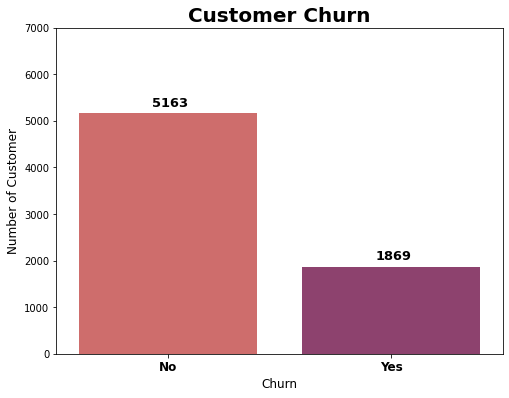

In [13]:
plt.figure(figsize=(8,6))

ax = sns.countplot(x="Churn", data=churn, palette = 'flare')

ax.set_title('Customer Churn', fontsize=20, fontweight='bold')
plt.xlabel("Churn", fontsize= 12)
plt.ylabel("Number of Customer", fontsize= 12)
plt.ylim(0,7000)
plt.xticks(fontsize = 12, fontweight='bold')

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.33, p.get_height()+150), fontsize = 13, fontweight='bold')
    
plt.show()

**Categorical Column**

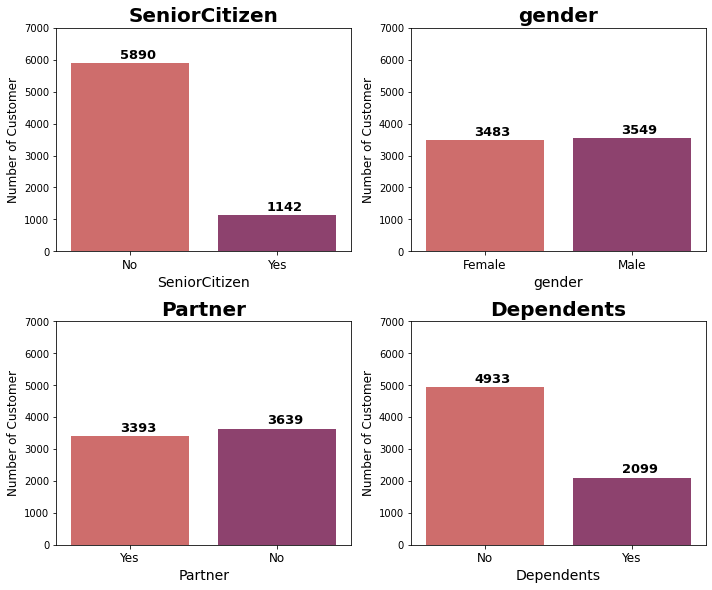

In [14]:
plt.figure(figsize=(10,20))

for i,col in enumerate(cats[0:4]):    
    plt.subplot(5,2,i + 1)
    
    ax = sns.countplot(data = churn, x = col, palette = 'flare')

    ax.set_title(col, fontsize=20, fontweight='bold')
    plt.xlabel(col, fontsize= 14)
    plt.ylabel("Number of Customer", fontsize= 12)
    plt.ylim(0,7000)
    plt.xticks(fontsize = 12)

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.33, p.get_height()+150), fontsize = 13, fontweight='bold')

plt.tight_layout()

plt.show()

Conclusion: 
- Most of the customers are not senior citizens
- The number of customers by gender is not much different
- Almost the same number of customers who have a partner and those who don't have a partner
- Most of customers not have dependent

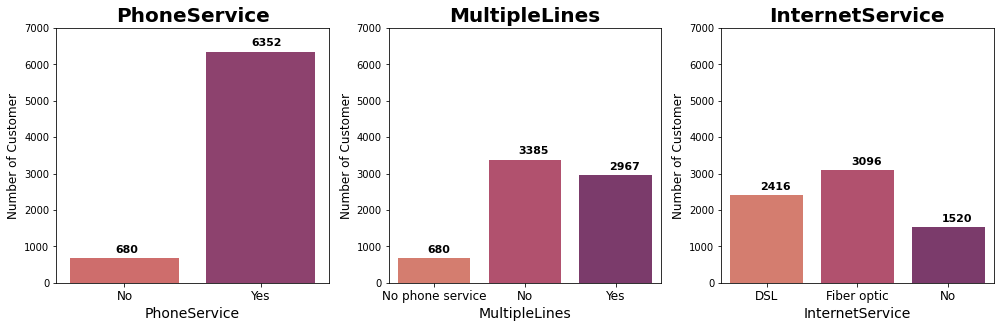

In [15]:
plt.figure(figsize=(14,21))

for i,col in enumerate(cats[4:7]):    
    plt.subplot(5,3,i + 1)
    
    ax = sns.countplot(data = churn, x = col, palette = 'flare')

    ax.set_title(col, fontsize=20, fontweight='bold')
    plt.xlabel(col, fontsize= 14)
    plt.ylabel("Number of Customer", fontsize= 12)
    plt.ylim(0,7000)
    plt.xticks(fontsize = 12)

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.33, p.get_height()+150), fontsize = 11, fontweight='bold')

plt.tight_layout()

plt.show()

Grouping into 2 for services, main service and additional service.
Main service is PhoneService, Multiplelines and InternetService

Conclusion:  
- Most of customers use phone service
- Almost half of customers do not use MultipleLines
- Fiber optic is the most popular internet service


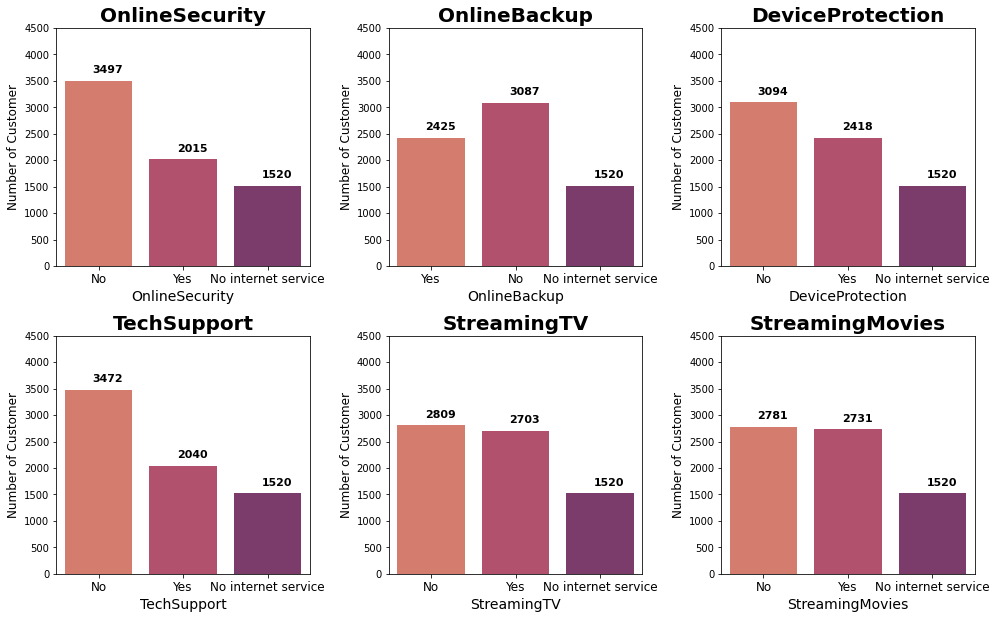

In [16]:
plt.figure(figsize=(14,21))

for i,col in enumerate(cats[7:13]):    
    plt.subplot(5,3,i + 1)
    
    ax = sns.countplot(data = churn, x = col, palette = 'flare')

    ax.set_title(col, fontsize=20, fontweight='bold')
    plt.xlabel(col, fontsize= 14)
    plt.ylabel("Number of Customer", fontsize= 12)
    plt.ylim(0,4500)
    plt.xticks(fontsize = 12)

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.33, p.get_height()+150), fontsize = 11, fontweight='bold')

plt.tight_layout()

plt.show()

Additional services is OnlineScurity, OnlineBackup, DeviceProtection, TechSupport, streamingTV and streamingMovie.

Conclusion:  
- Most of the customers who use internet service do not use additional services
- Number of customers who use streamingTV services and those who don't is not much different
- Number of customers who use streamingMovie services and those who don't is not much different



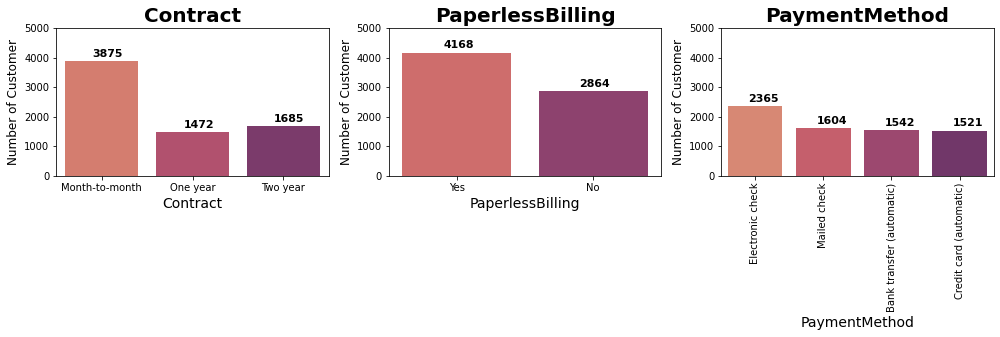

In [17]:
plt.figure(figsize=(14,20))

for i,col in enumerate(cats[13:16]):    
    plt.subplot(5,3,i + 1)
    
    ax = sns.countplot(data = churn, x = col, palette = 'flare')

    ax.set_title(col, fontsize=20, fontweight='bold')
    plt.xlabel(col, fontsize= 14)
    plt.ylabel("Number of Customer", fontsize= 12)
    plt.ylim(0,5000)
    if col == 'PaymentMethod':
      plt.xticks(rotation=90)
    
    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.3, p.get_height()+150), fontsize = 11, fontweight='bold')

plt.tight_layout()

plt.show()

Conclusion: 
- Month-to-month becomes the most popular in the contract
- Most of the customers have done paperless billing
- Electronic check becomes the most popular in the Payment Method



**Numerical Column**

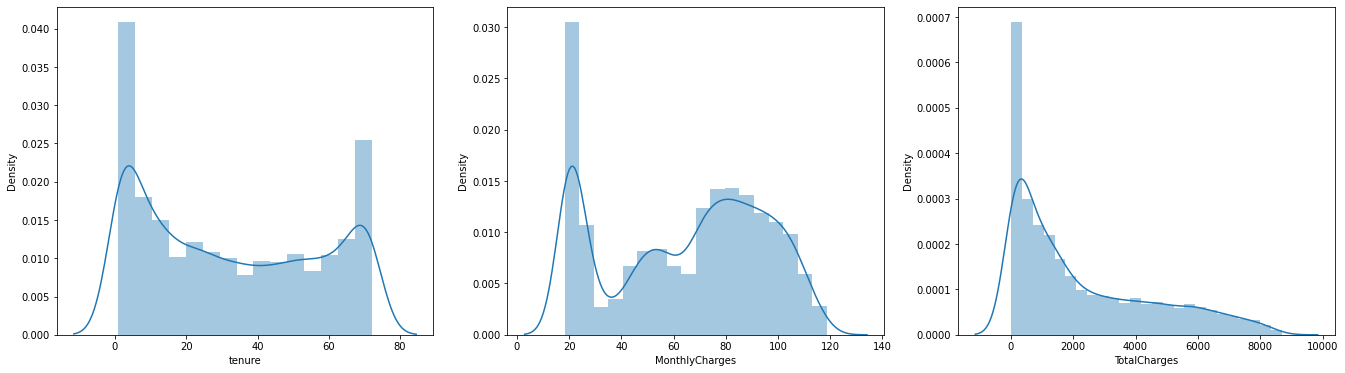

In [18]:
plt.figure(figsize=(25, 10))

for i in range(0, len(nums)):
  plt.subplot(2, 4, i+1)
  sns.distplot(x=churn[nums[i]])
  plt.xlabel(nums[i])
  plt.tight_layout()

Conclusion: 
- Tenure have a bimodal distribution
- Total charges have a positively skewed distribution



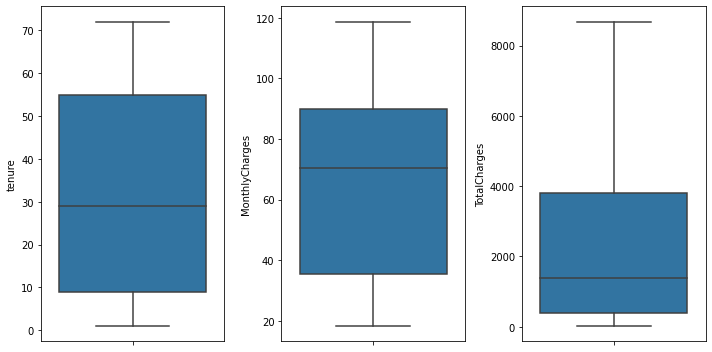

In [19]:
plt.figure(figsize=(10, 5))

for i in range(0, len(nums)):
  plt.subplot(1, len(nums), i+1)
  sns.boxplot(y=churn[nums[i]])
  plt.tight_layout()

if seen from the boxplot, there are no outliers in tenure, MonthlyCharges and TotalCharges column

## **Multivariate analysis**

**Categorical Column with Churn**

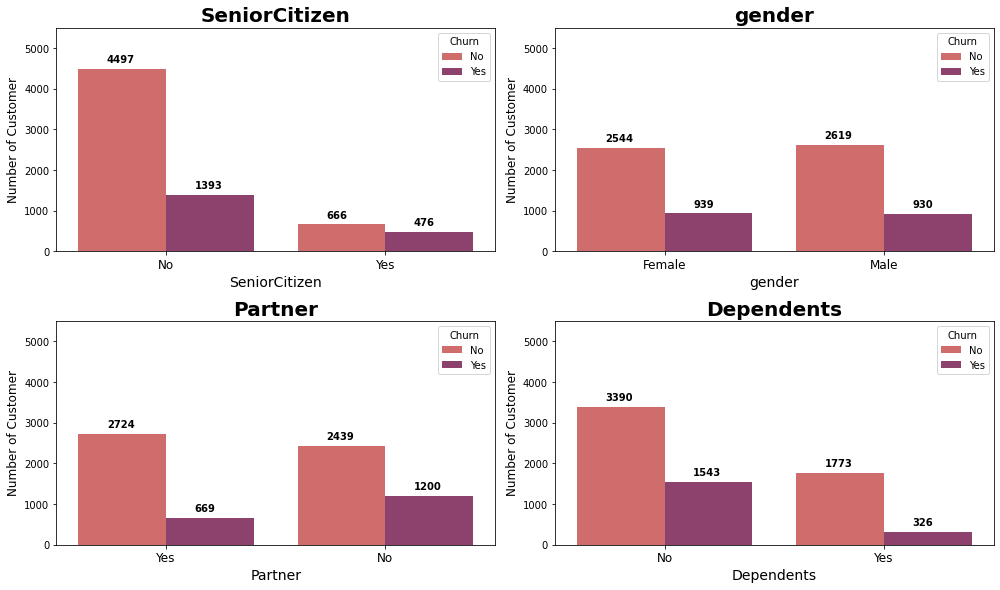

In [20]:
plt.figure(figsize=(14,20))

for i,col in enumerate(cats[0:4]):    
    plt.subplot(5,2,i + 1)
    
    ax = sns.countplot(data = churn, x = col, palette = 'flare', hue='Churn')

    ax.set_title(col, fontsize=20, fontweight='bold')
    plt.xlabel(col, fontsize= 14)
    plt.ylabel("Number of Customer", fontsize= 12)
    plt.ylim(0,5500)
    plt.xticks(fontsize = 12)

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.13, p.get_height()+150), fontsize = 10, fontweight='bold')

plt.tight_layout()

plt.show()

Conclusion: 
- Senior citizen customers have the possibility to churn than non-senior citizens
- The number of churn customers by gender is almost the same
- Single customers are more likely to churn
- Customers who have no dependents are more likely to churn



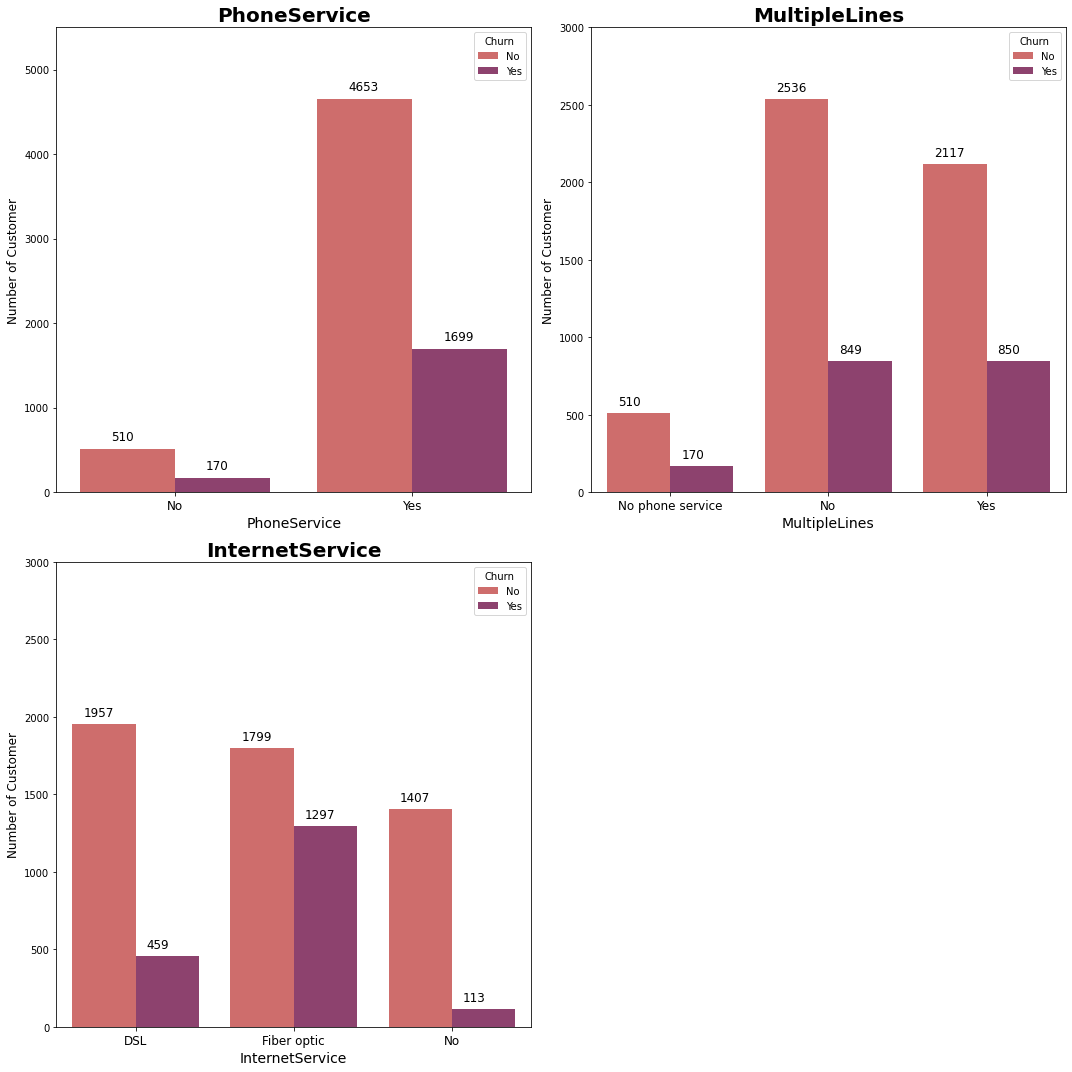

In [24]:
plt.figure(figsize=(15,15))

for i,col in enumerate(cats[4:7]):    
    plt.subplot(2,2,i + 1)
    
    ax = sns.countplot(data = churn, x = col, palette = 'flare',hue='Churn')

    ax.set_title(col, fontsize=20, fontweight='bold')
    plt.xlabel(col, fontsize= 14)
    plt.ylabel("Number of Customer", fontsize= 12)
    plt.xticks(fontsize = 12)
    if col == 'PhoneService':
      plt.ylim(0,5500) 
      for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.13, p.get_height()+100), fontsize = 12)
        
    else:
      plt.ylim(0,3000)
      for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.07, p.get_height()+50), fontsize = 12)
    
plt.tight_layout()

plt.show()

Conclusion: 
- Customers with fiber optic internet have a greater chance of churn
- Number of customers with MultipleLines or not, have almost the same churn probability



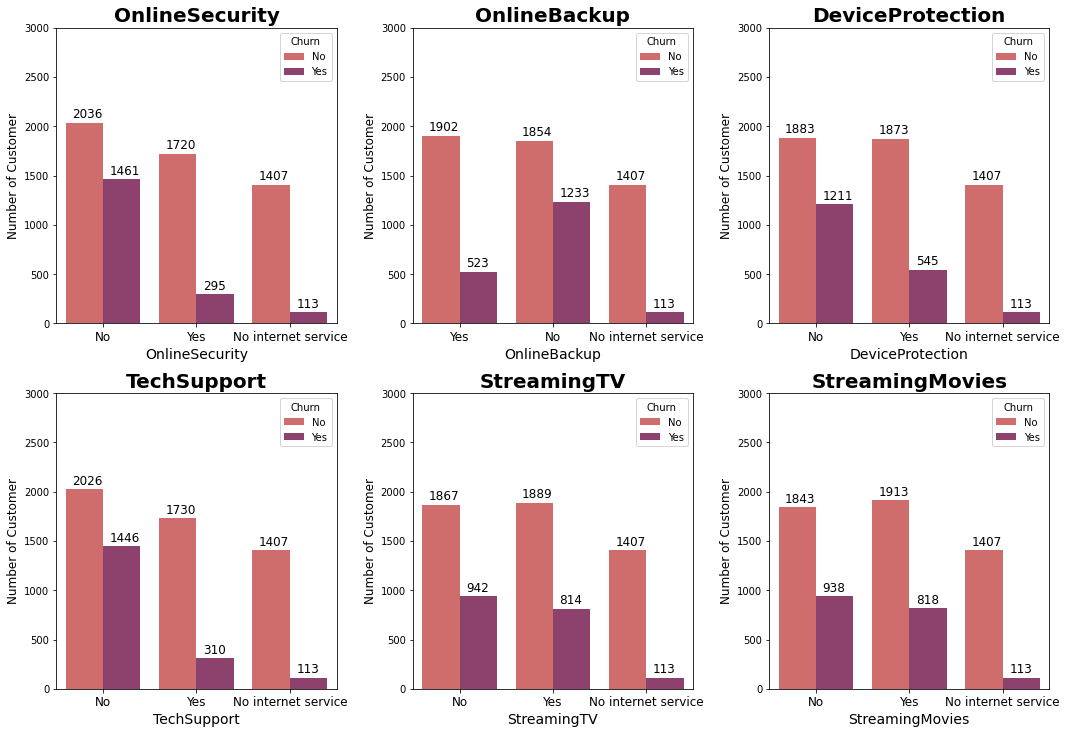

In [25]:
plt.figure(figsize=(15,25))

for i,col in enumerate(cats[7:13]):    
    plt.subplot(5,3,i + 1)
    
    ax = sns.countplot(data = churn, x = col, palette = 'flare', hue='Churn')

    ax.set_title(col, fontsize=20, fontweight='bold')
    plt.xlabel(col, fontsize= 14)
    plt.ylabel("Number of Customer", fontsize= 12)
    plt.ylim(0,3000)
    plt.xticks(fontsize = 12)

    if col == 'PhoneService':
      for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.13, p.get_height()+100), fontsize = 12)
        
    else:
      for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.07, p.get_height()+50), fontsize = 12)
    

plt.tight_layout()

plt.show()

Conclusion: 
- Most customers who will churn are customers who do not use additional services
- StreamingTV and StreamingMovies have almost the same probability of churn whether they use it or not



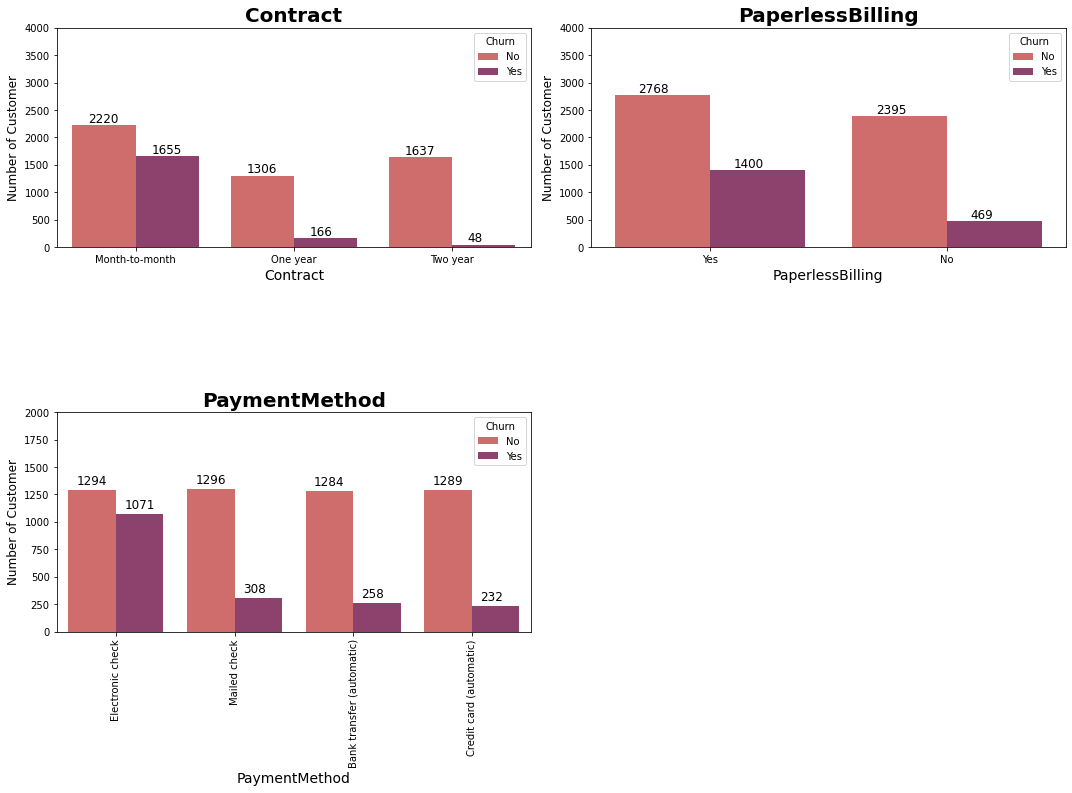

In [26]:
plt.figure(figsize=(15,25))

for i,col in enumerate(cats[13:16]):    
    plt.subplot(5,2,i + 1)
    
    ax = sns.countplot(data = churn, x = col, palette = 'flare', hue='Churn')

    ax.set_title(col, fontsize=20, fontweight='bold')
    plt.xlabel(col, fontsize= 14)
    plt.ylabel("Number of Customer", fontsize= 12)
    plt.ylim(0,4000)
    
    if col == 'PaymentMethod':
      plt.ylim(0,2000)
      plt.xticks(rotation=90)
      for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.07, p.get_height()+50), fontsize = 12)
    
    else :  
      for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+50), fontsize = 12)

plt.tight_layout()

plt.show()

Conclusion: 
- Most of the churn customers use month-to-month contracts


**Numerical Column**

Numerical column with Churn

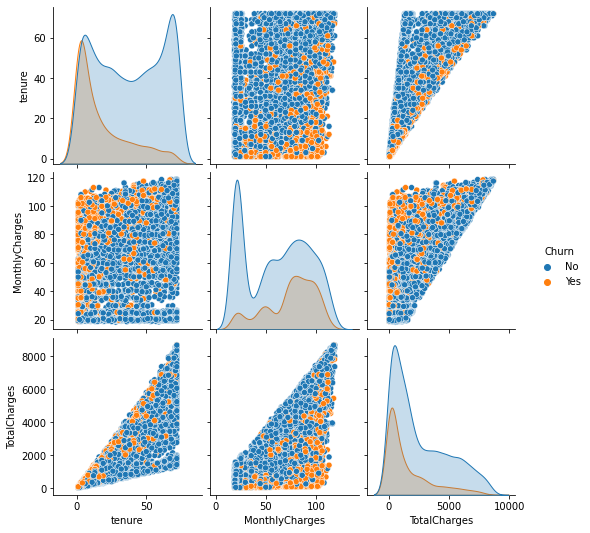

In [27]:
sns.pairplot(churn, hue='Churn')

Numerical column with gender

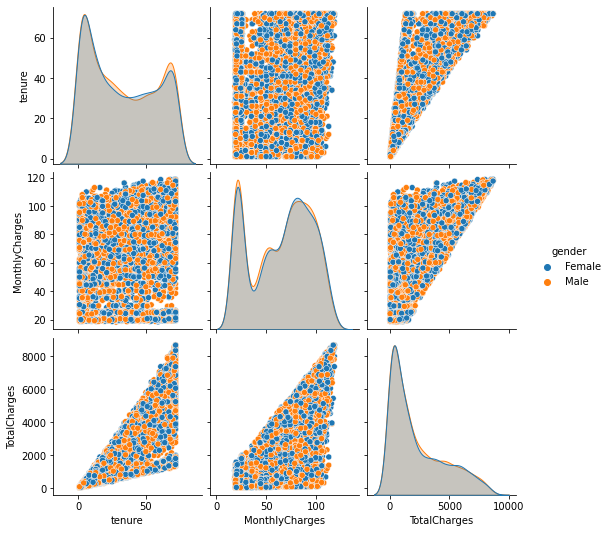

In [ ]:
sns.pairplot(churn, hue='gender')

Numerical column with Senior Citizen

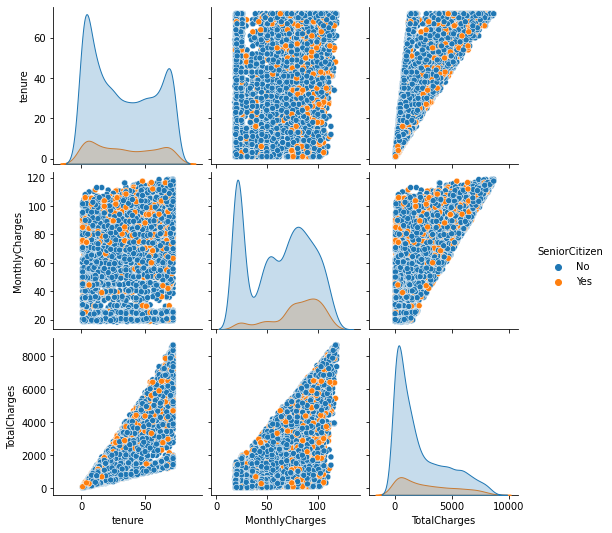

In [28]:
sns.pairplot(churn, hue='SeniorCitizen')

Heatmap

In [29]:
correlation = churn.corr()
correlation

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.246862,0.825880
MonthlyCharges,0.246862,1.000000,0.651065
TotalCharges,0.825880,0.651065,1.000000


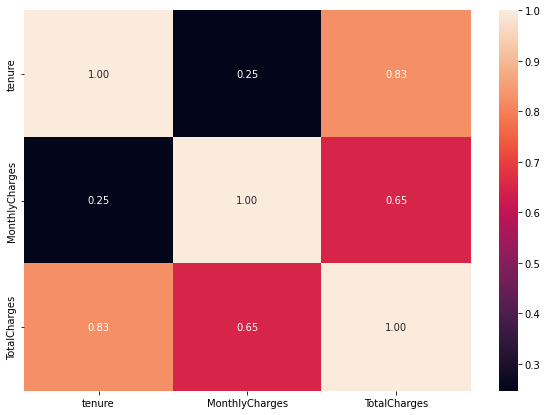

In [30]:
plt.figure(figsize=(10, 7))

sns.heatmap(correlation, annot=True, fmt='.2f')

From the heatmap correlation, it can be seen that tenure and Total Charges have a high correlation

# **Deep-dive Exploration**

1. Customers with a total charger above the average churn
2. Average total charges and tenure customers who churn and are not based on gender
3. Customers who use all additional services (OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV and StreamingMovie)


In [31]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Customers with a total charger above the average churn**

In [32]:
mean_t = churn['TotalCharges'].mean()

mean_c = churn[(churn['Churn'] == 'Yes') & (churn['TotalCharges'] > mean_t )]

In [33]:
mean_c.sort_values(by=['TotalCharges'], ascending=False)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4610,2889-FPWRM,Male,No,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),117.80,8684.80,Yes
1306,0201-OAMXR,Female,No,No,No,70,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,No,Credit card (automatic),115.55,8127.60,Yes
3890,3886-CERTZ,Female,No,Yes,No,72,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,109.25,8109.80,Yes
6537,1444-VVSGW,Male,No,Yes,No,70,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,No,Credit card (automatic),115.65,7968.85,Yes
5581,5271-YNWVR,Male,No,Yes,Yes,68,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,113.15,7856.00,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2673,8429-XIBUM,Male,No,No,No,22,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.35,2317.10,Yes
306,0265-EDXBD,Male,Yes,Yes,No,32,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.90,2303.35,Yes
1618,8017-LXHFA,Female,Yes,No,No,23,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.75,2293.60,Yes
6033,6595-YGXIT,Male,Yes,No,No,25,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,88.95,2291.20,Yes


There are 475 churn customers who have above average total charges

**Average total charges and tenure customers who churn and are not based on gender**

In [34]:
churn.groupby(['gender', 'Churn']).agg(
    avg_TotalCharges = ('TotalCharges', 'mean'),
    avg_tenure = ('tenure', 'mean'),
).reset_index()

,gender,Churn,avg_TotalCharges,avg_tenure
0,Female,No,2594.054422,37.933176
1,Female,Yes,1440.979499,17.004260
2,Male,No,2517.742402,37.374952
3,Male,Yes,1623.491559,18.963441


**Customers who use all additional services (Online Security, Online Backup, Device Protection, TechSupport, StreamingTV and StreamingMovie)**

In [35]:
churn[(churn['OnlineSecurity'] == 'Yes') & (churn['OnlineBackup'] == 'Yes') & 
      (churn['DeviceProtection'] == 'Yes') & (churn['TechSupport'] == 'Yes') & 
      (churn['StreamingTV'] == 'Yes') & (churn['StreamingMovies'] == 'Yes')
]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
15,3655-SNQYZ,Female,No,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No
28,5248-YGIJN,Male,No,Yes,No,72,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),90.25,6369.45,No
140,3146-MSEGF,Female,Yes,Yes,Yes,72,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),88.05,6425.65,No
153,9073-ZZIAY,Male,No,Yes,Yes,62,Yes,No,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Electronic check,86.10,5215.25,No
167,5997-OPVFA,Male,No,Yes,No,72,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),89.05,6254.45,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6859,3508-CFVZL,Female,No,No,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Mailed check,111.30,7985.90,No
6873,6369-MCAKO,Female,No,Yes,Yes,68,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),89.05,6185.80,No
6910,0530-IJVDB,Male,No,No,Yes,70,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,114.60,7882.50,No
6995,7164-BPTUT,Male,No,No,Yes,57,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Mailed check,89.55,5012.35,No
